In this notebook, we try to build an intuition of what convolutional neural networks learn by visualing the learned filters

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [62]:
# download an image
!wget https://i.ibb.co/09Z5d7k/1555686393-895375-1555686917-noticia-normal.jpg -O img.jpg
!wget https://i.ibb.co/C2dTzh0/Canon-Zoe-Kravitz.jpg -O img1.jpg
!wget https://i.ibb.co/gvpmnjn/2017-11-26-lif-36470786-I1.jpg -O img2.jpg

--2019-11-23 04:35:59--  https://i.ibb.co/09Z5d7k/1555686393-895375-1555686917-noticia-normal.jpg
Resolving i.ibb.co (i.ibb.co)... 64.31.6.154
Connecting to i.ibb.co (i.ibb.co)|64.31.6.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43168 (42K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>]  42.16K  --.-KB/s    in 0.04s   

2019-11-23 04:36:00 (1.03 MB/s) - ‘img.jpg’ saved [43168/43168]

--2019-11-23 04:36:02--  https://i.ibb.co/C2dTzh0/Canon-Zoe-Kravitz.jpg
Resolving i.ibb.co (i.ibb.co)... 64.31.6.154
Connecting to i.ibb.co (i.ibb.co)|64.31.6.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110981 (108K) [image/jpeg]
Saving to: ‘img1.jpg’

img1.jpg            100%[===================>] 108.38K   670KB/s    in 0.2s    

2019-11-23 04:36:03 (670 KB/s) - ‘img1.jpg’ saved [110981/110981]

--2019-11-23 04:36:04--  https://i.ibb.co/gvpmnjn/2017-11-26-lif-36470786-I1.jpg
Resolving i.ibb.co (i.ibb.co

In [0]:
# get the vgg16 model 
vgg = tf.keras.applications.vgg16.VGG16()

In [28]:
# examine all vgg16 layers
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Let's visualize the filters of the fist convolutional layer i.e "block1_conv1". This filter is a 3x3 filter.

In [29]:
first_kernel = vgg.get_layer("block1_conv1").kernel
first_kernel.shape

TensorShape([3, 3, 3, 64])

The shape shown above is 3x3x3x64. The filters receptive field is 3x3, the depth of the image is 3, and the number of filters used is 64. Hence, 64 3x3 filters of depth 3 are used.

Visualizing the filters at the first convolutional layer, enables us to understand what the filter learns. There are 64 3x3x3 filters. This filters can be viewed as 64 rgb images with of size 3x3x3. 

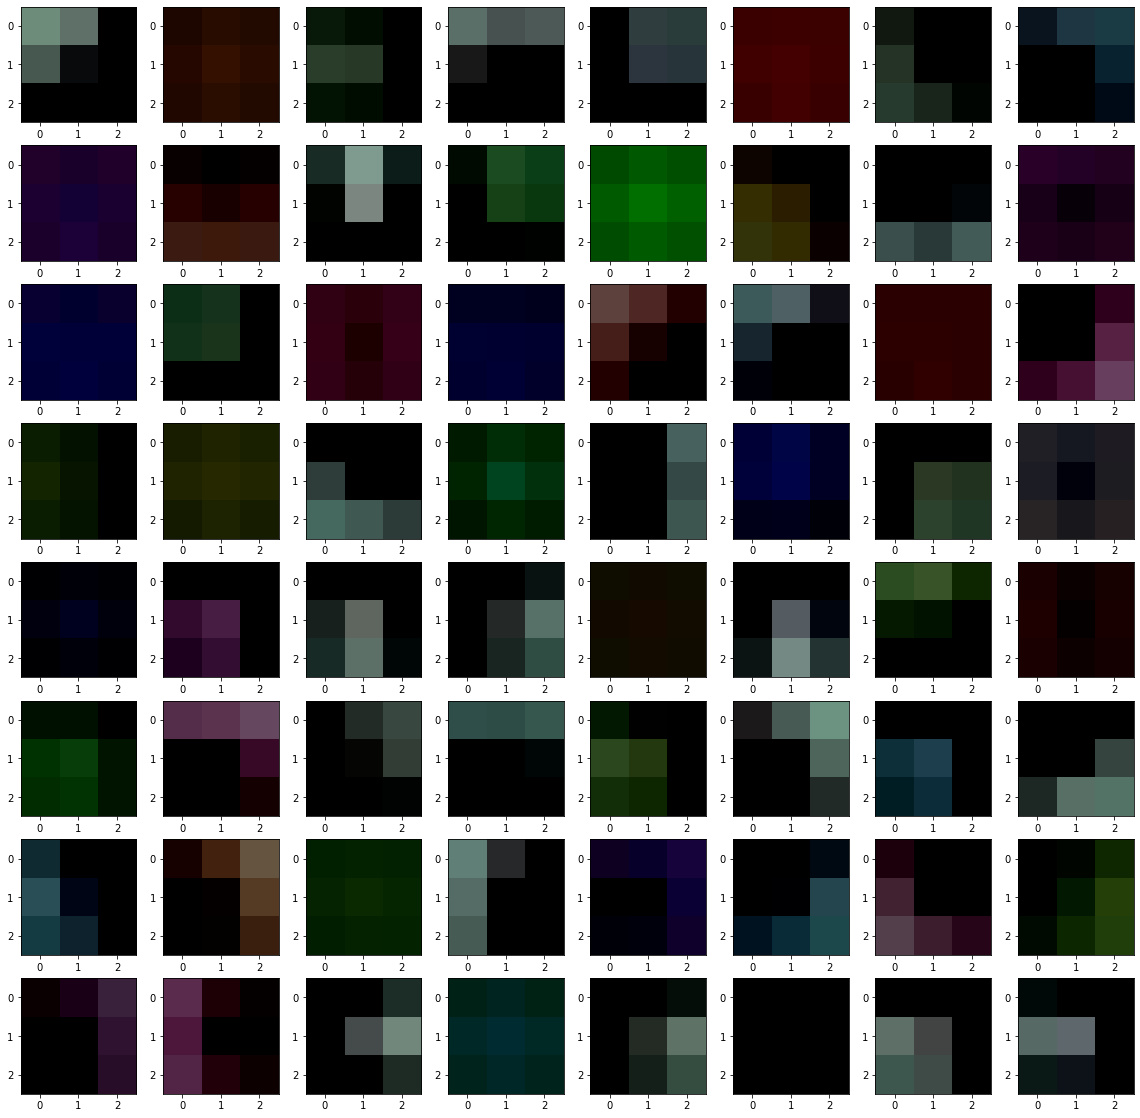

In [27]:
# clip the value to be between 0 and 1
first_kernel = tf.clip_by_value(first_kernel, 0, 1)
depth = first_kernel.shape[-1]
fig, axes = plt.subplots(8,8, figsize=(20,20))
for i in range(64):
    axes[i//8, i%8].imshow(first_kernel[:,:,:,i])

**Using the extracted features at FC7:**
The features extracted at the FC7 layer of a CNN can serve as a representation of the image. Images of the same class should have similar FC7 features to be classified as belonging to the same class.

By comparing the FC7 features of images using l2 distances, we can obtain similar images. The smaller the l2 distance, the closer the images.

**Visualizing feature maps**
Since it's difficult to visulaize the features at deeper layers as images, we can visualize the feature maps (outputs of convolution) instead to see what features were detected.

In [0]:
# read in the image
image = plt.imread("img2.jpg")

# change to float and make batch_size to be 1
image_arr = np.expand_dims(image/255., 0)

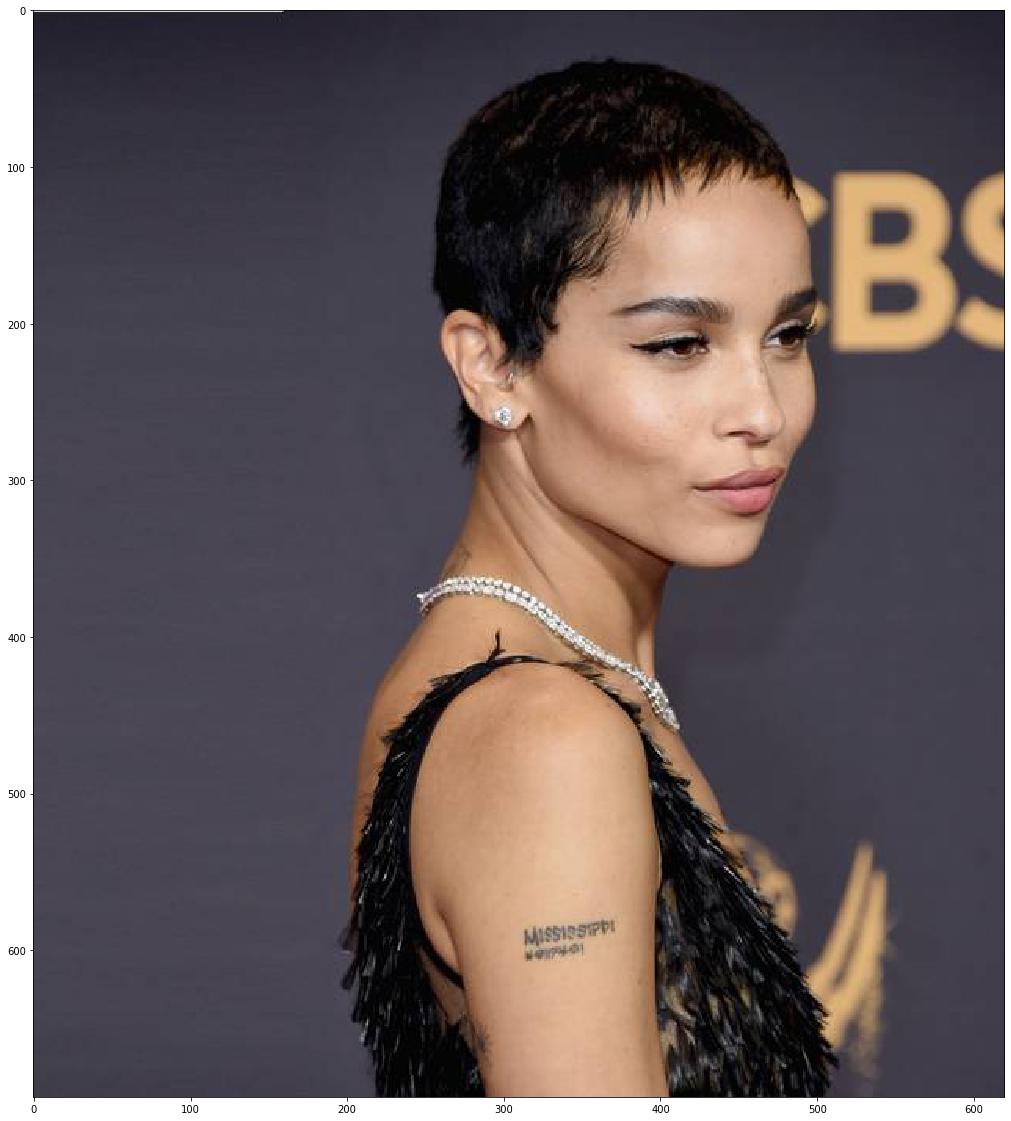

In [70]:
# display image
plt.figure(figsize=(20,20))
plt.imshow(image)

In [0]:
# model for obtaining feature map of a layer
layer = "block3_conv1"
conv5 = tf.keras.Model(inputs=[vgg.input], outputs=[vgg.get_layer(layer).output])

In [0]:
# extract conv5 feature map
feature_map5 = conv5(image_arr)

In [91]:
feature_map5.shape

TensorShape([1, 173, 155, 256])

The feature map can be viewed as 512 24X40 grayscale images

In [0]:
# clip values to be between 0 and 1
feature_map_clipped = tf.clip_by_value(feature_map5, 0, 1)
feature_map_clipped = tf.squeeze(feature_map_clipped)

In [0]:
ind = np.random.choice(feature_map5.shape[-1], 16, False)

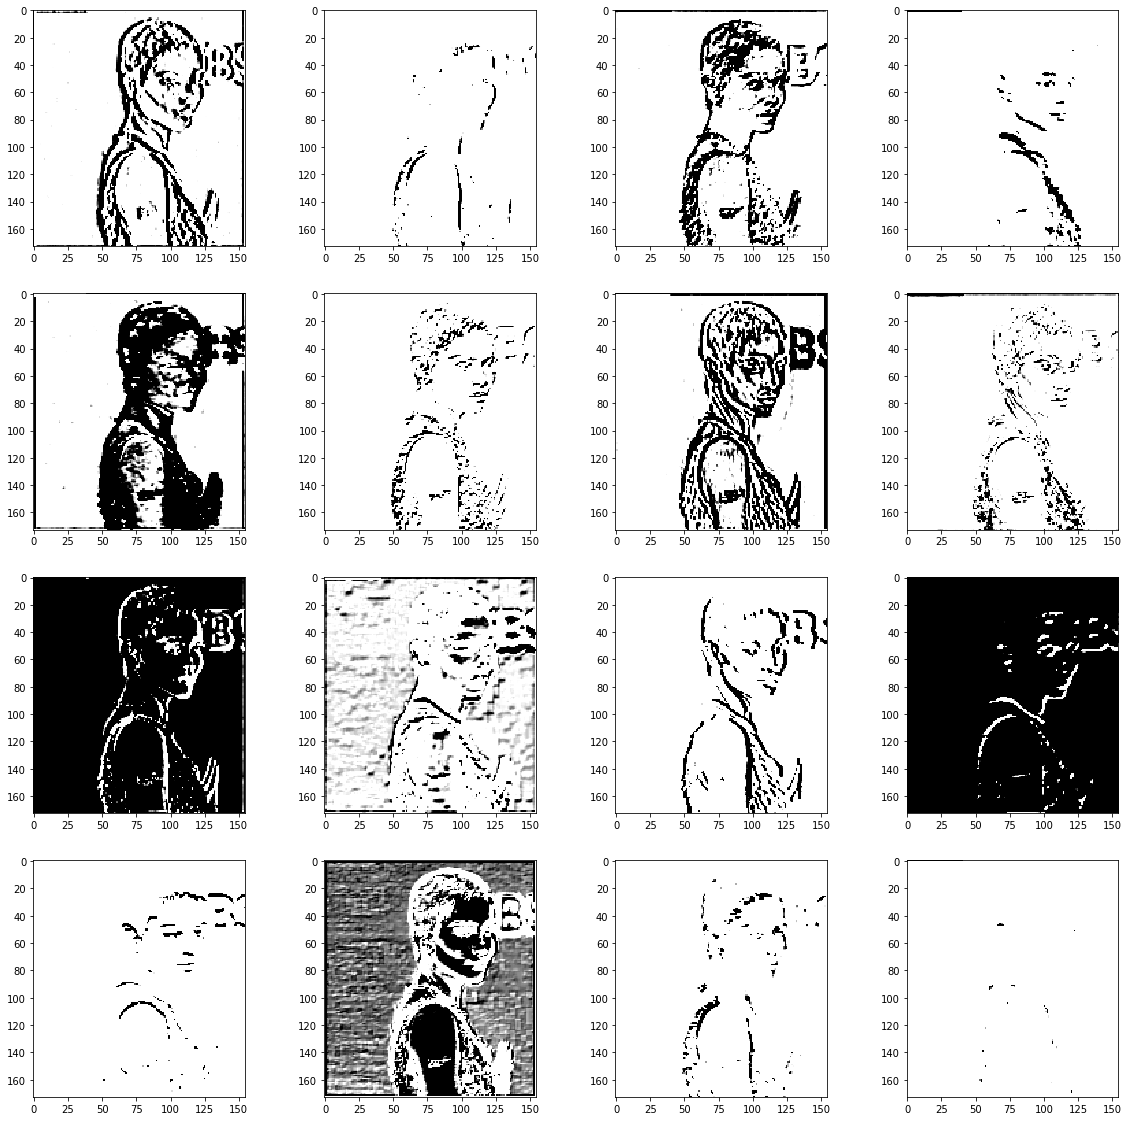

In [94]:
f_maps = tf.gather(feature_map_clipped, ind, axis=-1)
fig, axes = plt.subplots(4,4, figsize=(20,20))
for i in range(16):
    axes[i//4, i%4].imshow(f_maps[:,:,i], cmap="gray")

In [0]:
ind = np.random.choice(512, 8, False)